In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

df = pd.read_csv("/Users/ashleychen/Desktop/UIUC/IE 598/HW5/hw5_treasury yield curve data.csv")

# Exploratory Data Analysis

In [2]:
shape = df.shape
print('Shape = {}\n'.format(shape)) 

Shape = (8635, 32)



### Identifying missing values

In [3]:
df.isnull().sum()

Date         282
SVENF01      282
SVENF02      282
SVENF03      282
SVENF04      282
SVENF05      282
SVENF06      282
SVENF07      282
SVENF08      282
SVENF09      282
SVENF10      282
SVENF11      282
SVENF12      282
SVENF13      282
SVENF14      282
SVENF15      282
SVENF16      282
SVENF17      282
SVENF18      282
SVENF19      282
SVENF20      282
SVENF21      282
SVENF22      282
SVENF23      282
SVENF24      282
SVENF25      282
SVENF26      282
SVENF27      282
SVENF28      282
SVENF29      282
SVENF30      282
Adj_Close    564
dtype: int64

### Drop rows where all columns are NaN

In [4]:
drop_row = df.dropna(how='all')
new_shape = drop_row.shape
print('New Shape = {}\n'.format(new_shape))

New Shape = (8353, 32)



### A table of summary statistics for each of the 30 explanatory variables

In [5]:
print(drop_row.iloc[:,-31:-1].describe())

           SVENF01      SVENF02      SVENF03      SVENF04     SVENF05  \
count  8353.000000  8353.000000  8353.000000  8353.000000  8353.00000   
mean      3.895104     4.371348     4.779336     5.128279     5.42020   
std       2.671616     2.531630     2.379307     2.260085     2.17498   
min       0.072700     0.327300     0.630300     1.013000     1.42450   
25%       1.220600     1.923100     2.619300     3.076300     3.66070   
50%       4.126300     4.501300     4.635400     4.873300     5.17140   
75%       6.063800     6.453800     6.700200     6.920700     7.11000   
max       9.813800     9.887800    10.145600    10.459900    10.64990   

           SVENF06      SVENF07      SVENF08      SVENF09      SVENF10  ...  \
count  8353.000000  8353.000000  8353.000000  8353.000000  8353.000000  ...   
mean      5.657948     5.845959     5.989599     6.094526     6.166257  ...   
std       2.116034     2.074912     2.045118     2.022213     2.003407  ...   
min       1.698200     1.8

### Heatmap for showing correlation for 30 explanatory variables

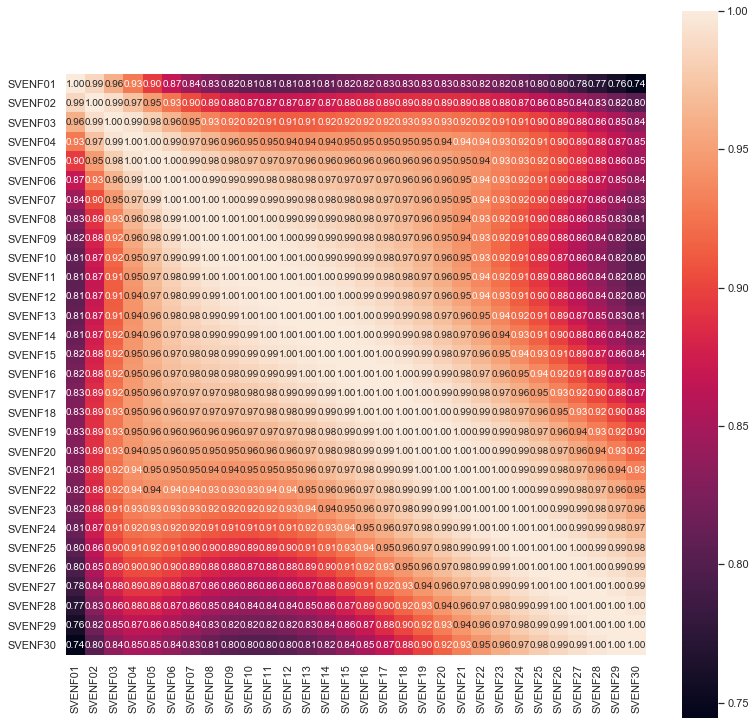

In [6]:
data = drop_row.iloc[:,-31:-1].values.T
cm =  np.corrcoef(data)
sns.set(font_scale = 1.0)
fig, ax = plt.subplots(figsize = (13,13))
col = ['SVENF01','SVENF02','SVENF03','SVENF04','SVENF05',
       'SVENF06','SVENF07','SVENF08','SVENF09','SVENF10',
       'SVENF11','SVENF12','SVENF13','SVENF14','SVENF15',
       'SVENF16','SVENF17','SVENF18','SVENF19','SVENF20',
       'SVENF21','SVENF22','SVENF23','SVENF24','SVENF25',
       'SVENF26','SVENF27','SVENF28','SVENF29','SVENF30']
hm = sns.heatmap(cm,
                cbar = True,
                square = True,
                fmt = '.2f',
                annot = True,
                annot_kws = {'size':10},
                yticklabels = col,
                xticklabels = col)
plt.show()

### Imputing missing values

In [7]:
imputed_data = drop_row.fillna(drop_row.mean())
imputed_shape = imputed_data.shape
print('Imputed Data Shape = {}\n'.format(imputed_shape))

Imputed Data Shape = (8353, 32)



### Split data into training and test sets

In [8]:
X = imputed_data.drop(['Date','Adj_Close'],axis = 1).values
y = imputed_data['Adj_Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.15, random_state = 42)

### Standardization

In [9]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


# Perform a PCA on the Treasury Yield dataset

### Compute and Display the Explained Variance Ratio for All Components

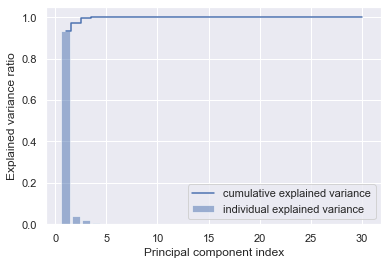

In [10]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
            sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,31),var_exp, alpha = 0.5, align = 'center',
       label = 'individual explained variance')
plt.step(range(1,31),cum_var_exp, where = 'mid',
        label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.show()

### PCA

In [11]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

### Compute and Display the Explained Variance Ratio for the 3 Components

The Explained Variance Ratio for the 3 components:

In [12]:
print(pca.explained_variance_ratio_)

[0.93646301 0.03771382 0.02045808]


The Cumulated Explained Variance Ratio for the 3 components:

In [13]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.93646301 0.97417682 0.99463491]


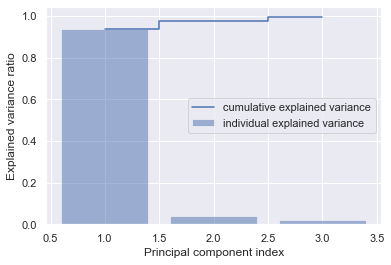

In [14]:
plt.bar(range(1,4), pca.explained_variance_ratio_, alpha = 0.5, align = 'center',
       label = 'individual explained variance')
plt.step(range(1,4), np.cumsum(pca.explained_variance_ratio_), where = 'mid',
    label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.show()

The Explained Variance of the 3 Component Version:

In [15]:
print(pca.explained_variance_)

[28.11632947  1.13231815  0.61423267]


The Cumulative Explained Variance of the 3 Component Version:

In [16]:
print(np.cumsum(pca.explained_variance_))

[28.11632947 29.24864762 29.86288029]


# Logistic Regression Classifier v. SVM Classifier - baseline

### Logistic Classifier Model to Original Dataset

In [17]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
y_train_transform = (y_train*1000).astype(int)
lr.fit(X_train_std, y_train_transform)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
lr_train_pred = lr.predict(X_train_std) / 1000
lr_test_pred = lr.predict(X_test_std) / 1000

R2 Score:

In [19]:
print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, lr_train_pred),
           r2_score(y_test, lr_test_pred)))

R^2 train: 0.926, test: 0.928


R2 Score:

In [20]:
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_train, lr_train_pred)),
        sqrt(mean_squared_error(y_test, lr_test_pred))))

RMSE train: 0.668, test: 0.655


### Logistic Classifier Model to 3 Components

In [21]:
new_lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)
new_lr.fit(X_train_pca, y_train_transform)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr_train_pred2 = new_lr.predict(X_train_pca) / 1000
lr_test_pred2 = new_lr.predict(X_test_pca) / 1000

R2 Score:

In [23]:
print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, lr_train_pred2),
           r2_score(y_test, lr_test_pred2)))

R^2 train: 0.883, test: 0.884


RMSE Score:

In [24]:
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_train, lr_train_pred2)),
        sqrt(mean_squared_error(y_test, lr_test_pred2))))

RMSE train: 0.836, test: 0.833


### SVM Classifier Model to Original Dataset

In [25]:
original_svr = svm.SVR(kernel = 'linear')
original_svr.fit(X_train_std, y_train)
original_train_pred = original_svr.predict(X_train_std)
original_test_pred = original_svr.predict(X_test_std)

R2 Score:

In [26]:
print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, original_train_pred),
           r2_score(y_test, original_test_pred)))

R^2 train: 0.841, test: 0.836


RMSE Score:

In [27]:
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_train, original_train_pred)),
        sqrt(mean_squared_error(y_test, original_test_pred))))

RMSE train: 0.977, test: 0.991


### SVM Classifier Model to 3 Components

In [29]:
new_svr = svm.SVR(kernel = 'linear')
new_svr.fit(X_train_pca, y_train)
new_train_pred = new_svr.predict(X_train_pca)
new_test_pred = new_svr.predict(X_test_pca)

R2 Score:

In [30]:
print('R^2 train: %.3f, test: %.3f' % (
           r2_score(y_train, new_train_pred),
           r2_score(y_test, new_test_pred)))

R^2 train: 0.813, test: 0.805


RMSE Score:

In [31]:
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y_train, new_train_pred)),
        sqrt(mean_squared_error(y_test, new_test_pred))))

RMSE train: 1.058, test: 1.080


In [32]:
print("My name is Yu Chi Chen")
print("My NetID is: yuchicc2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yu Chi Chen
My NetID is: yuchicc2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
